# Statystyka matematyczna - ćwiczenia laboratoryjne

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw zadań 3: Rozkłady zmiennych losowych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_2d_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca nazwy kolumn z wariantami pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks z wariantami drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są prawdopodobieństwami poszczególnych wariantów zmiennej.
    cdf: pandas.DataFrame
        Tablica zawierająca nazwy kolumny w formacie pandas.IntervalIndex z przedziałami wartości pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks w formacie pandas.IntervalIndex z przedziałami wartości drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są wartościami dystrybuanty dla poszczególnych przedziałów.
    mask: numpy.ndarray
        Macierz logiczna 2D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta dwuwymiarowej zmiennej losowej dyskretnej")

    if mask is None:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[0])
    else:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'darkgreen'}, linewidths=2, linecolor='grey', mask=~mask, ax=axes[0])
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'red'}, linewidths=2, linecolor='grey', mask=mask, cbar=False, ax=axes[0])
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].tick_params(labelrotation=0)

    sns.heatmap(data=cdf, vmin=0, vmax=1, cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[1])
    axes[1].set_title("Dystrybuanta")
    axes[1].tick_params(labelrotation=45)


### Dane do zadań

Pliki r1p.pkl oraz r1f.pkl zawierają funkcję rozkładu prawdopodobieństwa oraz dystrybuantę przykładowej dwywymiarowej zmiennej losowej dyskretnej.

W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
r1p = pd.read_pickle("r1p.pkl")
r1p

x,1,2,3,4
y,,,,
0,0.060,0.100,0.160,0.080
5,0.018,0.030,0.048,0.024
10,0.027,0.045,0.070,0.028
15,0.045,0.075,0.120,0.070


In [5]:
r1f = pd.read_pickle("r1f.pkl")
r1f

x,"[-inf, 1.0)","[1.0, 2.0)","[2.0, 3.0)","[3.0, 4.0)","[4.0, inf)"
y,,,,,
"[-inf, 0.0)",0.0,0.000,0.000,0.000,0.00
"[0.0, 5.0)",0.0,0.060,0.160,0.320,0.40
"[5.0, 10.0)",0.0,0.078,0.208,0.416,0.52
"[10.0, 15.0)",0.0,0.105,0.280,0.558,0.69
"[15.0, inf)",0.0,0.150,0.400,0.798,1.00


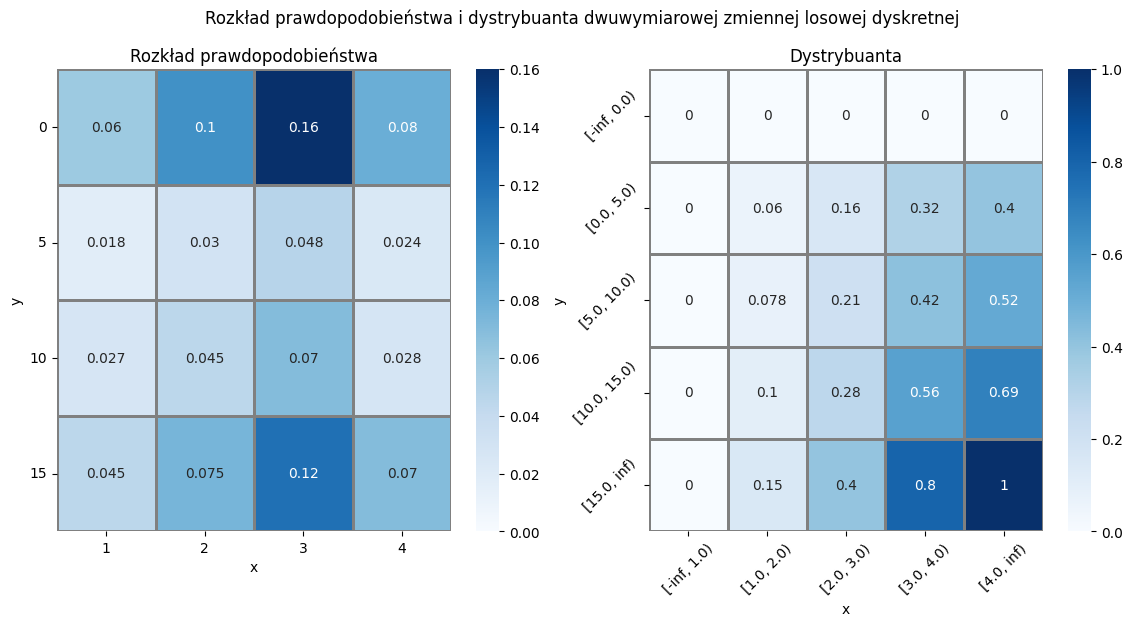

In [6]:
vizualize_2d_discrete_distribution(r1p, r1f)

### Zadanie 1: Przykładowy dwuwymiarowy dyskretny rozkład prawdopodobieństwa [17 pkt]

Bazując na wczytanym do notatnika przykładowym dwuwymiarowym rozkładzie prawdopodobieństwa oblicz jego rozkłady brzegowe, wybrane rozkłady warunkowe oraz podstawowe parametry rozkładu.

#### a) Rozkłady brzegowe

Przedstaw funkcje brzegowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1bx`  i `r1by` o następującej strukturze:

Tablica `r1bx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x) - prawdopodobieństwa rozkładu brzegowego zmiennej X.

Tablica `r1by`:
> Indeks:</br>
> y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y) - prawdopodobieństwa rozkładu brzegowego zmiennej Y.

In [7]:
r1bx = r1p.sum(axis=0).to_frame(name="P(X=x)")
r1bx

,P(X=x)
x,
1,0.150
2,0.250
3,0.398
4,0.202


In [8]:
# Komórka testowa
assert type(r1bx) == pd.DataFrame
assert r1bx.shape == (4, 1)
assert list(r1bx.columns) == ["P(X=x)"]
assert r1bx.index.name == 'x'
assert np.isclose(np.sum(r1bx.index.values), 10)
assert np.isclose(np.sum(r1bx["P(X=x)"]), 1)

In [9]:
r1by = r1p.sum(axis=1).to_frame(name="P(Y=y)")
r1by

,P(Y=y)
y,
0,0.40
5,0.12
10,0.17
15,0.31


In [10]:
# Komórka testowa
assert type(r1by) == pd.DataFrame
assert r1by.shape == (4, 1)
assert list(r1by.columns) == ["P(Y=y)"]
assert r1by.index.name == 'y'
assert np.isclose(np.sum(r1by.index.values), 30)
assert np.isclose(np.sum(r1by["P(Y=y)"]), 1)

#### b) Przykładowe rozkłady warunkowe

Przedstaw funkcje przykładowych warunkowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1wx`  i `r1wy` o następującej strukturze:

Tablica `r1wx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x|Y=5) - prawdopodobieństwa rozkładu warunkowego P(X=x|Y=5) zmiennej X.

Tablica `r1wy`:
> Indeks:</br>
> y- warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y|X=2) - prawdopodobieństwa rozkładu warunkowego P(Y=y|X=2) zmiennej Y.

In [11]:
P_Y5 = r1by.loc[5, "P(Y=y)"]
r1wx = (r1p.loc[5] / P_Y5).to_frame(name="P(X=x|Y=5)")
r1wx

,P(X=x|Y=5)
x,
1,0.15
2,0.25
3,0.40
4,0.20


In [12]:
# Komórka testowa
assert type(r1wx) == pd.DataFrame
assert r1wx.shape == (4, 1)
assert list(r1wx.columns) == ["P(X=x|Y=5)"]
assert r1wx.index.name == 'x'
assert np.isclose(np.sum(r1wx.index.values), 10)
assert np.isclose(np.sum(r1wx["P(X=x|Y=5)"]), 1)

In [13]:
P_X2 = r1bx.loc[2, "P(X=x)"]
r1wy = (r1p[2] / P_X2).to_frame(name="P(Y=y|X=2)")
r1wy

,P(Y=y|X=2)
y,
0,0.40
5,0.12
10,0.18
15,0.30


In [14]:
# Komórka testowa
assert type(r1wy) == pd.DataFrame
assert r1wy.shape == (4, 1)
assert list(r1wy.columns) == ["P(Y=y|X=2)"]
assert r1wy.index.name == 'y'
assert np.isclose(np.sum(r1wy.index.values), 30)
assert np.isclose(np.sum(r1wy["P(Y=y|X=2)"]), 1)

#### c) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej dwuwymiarowej X, Y - wartość średnia (`r1_mean`), wariancja(`r1_var`), odchylenie standardowe (`r1_std`), kowariancję (`r1_cov`) oraz współczynnik korelacji (`r1_r`).

In [15]:
X_values = r1p.columns.values
Y_values = r1p.index.values
r1_mean = 0
for x in X_values:
    for y in Y_values:
        r1_mean +=float( x * y * r1p.loc[y, x])

In [16]:
E_X = float(np.sum(X_values * np.sum(r1p.values, axis=0)))
E_Y = float(np.sum(Y_values * np.sum(r1p.values, axis=1)))
r1_var = 0
for x in X_values:
    for y in Y_values:
        r1_var +=((x - E_X) ** 2) * ((y - E_Y) ** 2) * r1p.loc[y, x]
r1_var=float(r1_var)

In [17]:
r1_std=np.sqrt(r1_var)
r1_std=float(r1_std)

In [18]:
r1_cov = 0
for x in X_values:
    for y in Y_values:
        r1_cov +=(x - E_X) *(y - E_Y) * r1p.loc[y, x]
r1_cov=float(r1_cov)

In [19]:
rx_var = 0
for x in X_values:
    for y in Y_values:
        rx_var += ((x - E_X) ** 2) * r1p.loc[y, x]
rx_var = float(rx_var)
ry_var = 0
for y in Y_values:
    for x in X_values:
        ry_var += ((y - E_Y) ** 2) * r1p.loc[y, x]
ry_var = float(ry_var)
rx_std = np.sqrt(rx_var)
ry_std = np.sqrt(ry_var)
r1_r = r1_cov / (rx_std * ry_std)

In [20]:
# Komórka testowa
assert np.isclose(r1_mean, 18.505)
assert np.isclose(r1_var, 38.96800412)
assert np.isclose(r1_std, 6.242435752172384)
assert np.isclose(r1_cov, 0.07360000000000022)
assert np.isclose(r1_r, 0.011848900761810917)

### Zadanie 2: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>2, 0<Y<=10)
- P(X<=2|X>3, Y>=5)

Wyniki zapisz kolejno do zmiennych `p1` i `p2`oraz przedstaw na wykresach korzystając z funkcji `vizualize_2d_discrete_distribution()`.

#### a) P(X>2, 0<Y<=10)

P(X>2, 0<Y<=10) = 0.17


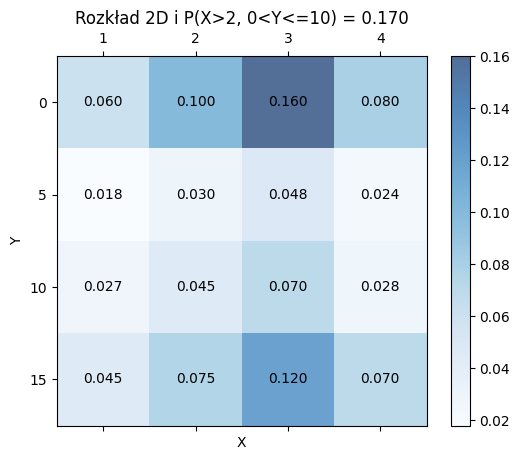

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_2d_discrete_distribution(x_values, y_values, p, title):
    
    fig, ax = plt.subplots()
    cax = ax.matshow(p, cmap='Blues', alpha=0.7)
    fig.colorbar(cax)

    
    ax.set_xticks(range(len(x_values)))
    ax.set_yticks(range(len(y_values)))
    ax.set_xticklabels(x_values)
    ax.set_yticklabels(y_values)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title(title)

    for i in range(len(y_values)):
        for j in range(len(x_values)):
            ax.text(j, i, f"{p[i,j]:.3f}",
                    va='center', ha='center', color='black')

    plt.show()


x_values = [1, 2, 3, 4]
y_values = [0, 5, 10, 15]


p = np.array([
    [0.06,  0.10,  0.16,  0.08],   # Y=0
    [0.018, 0.030, 0.048, 0.024], # Y=5
    [0.027, 0.045, 0.070, 0.028], # Y=10
    [0.045, 0.075, 0.120, 0.070]  # Y=15
])


p1 = p[1,2] + p[1,3] + p[2,2] + p[2,3]

print("P(X>2, 0<Y<=10) =", p1)

visualize_2d_discrete_distribution(
    x_values,
    y_values,
    p,
    title=f"Rozkład 2D i P(X>2, 0<Y<=10) = {p1:.3f}"
)


In [22]:
# Komórka testowa
assert np.isclose(p1, 0.17)

#### b) P(X<=2|X>3, Y>=5)

P(X<=2 | (X>3 or Y>=5)) = 0.362


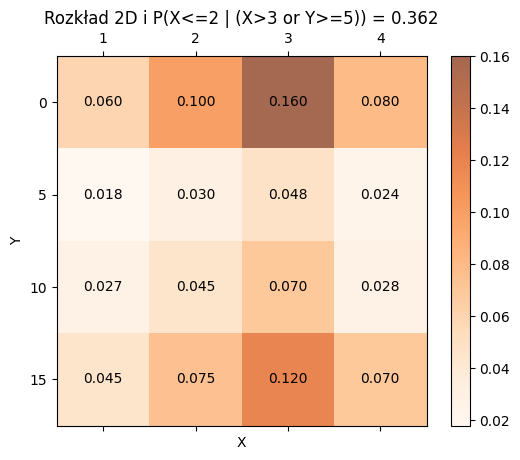

In [23]:
def visualize_2d_discrete_distribution(x_values, y_values, p, title):
    fig, ax = plt.subplots()
    cax = ax.matshow(p, cmap='Oranges', alpha=0.7)
    fig.colorbar(cax)
    
    ax.set_xticks(range(len(x_values)))
    ax.set_yticks(range(len(y_values)))
    ax.set_xticklabels(x_values)
    ax.set_yticklabels(y_values)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title(title)
    
    for i in range(len(y_values)):
        for j in range(len(x_values)):
            ax.text(j, i, f"{p[i, j]:.3f}", va='center', ha='center', color='black')
    
    plt.show()

x_values = [1, 2, 3, 4]
y_values = [0, 5, 10, 15]

p = np.array([
    [0.060, 0.100, 0.160, 0.080],  # Y = 0
    [0.018, 0.030, 0.048, 0.024],  # Y = 5
    [0.027, 0.045, 0.070, 0.028],  # Y = 10
    [0.045, 0.075, 0.120, 0.070]   # Y = 15
])


numerator = p[1, 0] + p[1, 1] + p[2, 0] + p[2, 1] + p[3, 0] + p[3, 1]

denom = 0.663

p2 = round(numerator / denom, 3)

print("P(X<=2 | (X>3 or Y>=5)) =", p2)

visualize_2d_discrete_distribution(
    x_values,
    y_values,
    p,
    title=f"Rozkład 2D i P(X<=2 | (X>3 or Y>=5)) = {p2:.3f}"
)


In [24]:
# Komórka testowa
assert np.isclose(p2, 0.362)

### Zadanie 3: Niezależność zmiennych losowych [2 pkt]

Sprawdź, czy zmienne losowe X i Y są zmiennymi niezależnymi i zapisz wynik testu (True/False) do zmiennej `test`.

In [25]:
p = np.array([
    [0.060, 0.100, 0.160, 0.080],
    [0.018, 0.030, 0.048, 0.024],
    [0.027, 0.045, 0.070, 0.028],
    [0.045, 0.075, 0.120, 0.070]
])

pX = p.sum(axis=0)
pY = p.sum(axis=1)

test = True

for i in range(p.shape[0]):
    for j in range(p.shape[1]):
        if not np.isclose(p[i, j], pY[i] * pX[j], atol=1e-6):
            test = False
            break
    if not test:
        break

print(test)


False


In [26]:
# Komórka testowa
assert test==False